# Import package

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from google.colab import drive
# drive.mount('/content/drive')

# Load data

In [47]:
load_data = pd.read_csv('nyc-rolling-sales.csv') # dari vscode
#load_data = pd.read_csv('/content/drive/MyDrive/...msib/PYTN_ASS_2/nyc-rolling-sales.csv') # dari colab

nyc = load_data

Berikut adalah penjelasan mengenai variabel-variabel dalam dataset ini:

1. Borough : Nama borough tempat properti berada.

2. Neighborhood : Nama area yang ditetapkan penilai departemen keuangan.

3. Building Class Category : Kategori umum bangunan atau properti.

4. Tax Class at Present : Kelas Pajak.

5. Block : Sub-divisi dari borough tempat properti.

6. Lot : Sub-divisi dari Block dan mewakili lokasi unik properti.

7. Easement : Hak guna bangunan.

8. Buliding Class at Present : Kelas atau kategori umum dari tipe bangunan properti tersebut.

9. Address : Alamat yang tercantum pada berkas penjualan. Penjualan koperasi menyantumkan nomor apartment

10. Zip Code : Kode pos.

11. Residential Unit : Jumlah unit hunian.

12. Commercial Unit : Jumlah unit komersial.

13. Total Unit :  Jumlah Properti.

14. Land Square Feet : Luas tanah.

15. Gross Square Feet : Luas total semua lantai bangunan.

16. Year Built : Tahun dibangun.

17. Building Class at Time of Sale : Kelas  atau klasifikasi bangunan pada saat penjualan properti terjadi.

18. Sale Price : Harga jual.

19. Sale Date :  Tanggal penjualan.

# Data cleanning

In [48]:
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [49]:
# drop kolom yang tidak diperlukan
nyc.drop(["Unnamed: 0"], axis=1, inplace=True)

In [50]:
# mengubah kode angka menjadi nama borough pada kolom 'BOROUGH"

borough_name = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}

nyc['BOROUGH'] = nyc['BOROUGH'].replace(borough_name)

In [51]:
variabel_angka = ['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']

for kolom in variabel_angka:
    nyc[kolom] = pd.to_numeric(nyc[kolom],  errors='coerce')

In [52]:
kategori = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','ZIP CODE','YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE']

for kolom in kategori:
    nyc[kolom] = nyc[kolom].astype("category")

In [53]:
nyc['SALE DATE']= pd.to_datetime(nyc['SALE DATE'], errors='coerce')

In [54]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [55]:
nyc.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,6.998700e+04
mean,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1.276456e+06
std,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,2.250000e+05
50%,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,5.300000e+05
75%,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [56]:
nyc.replace(' ',np.nan, inplace=True)

In [57]:
nyc.replace('-',np.nan, inplace=True)

In [58]:
nyc['LAND SQUARE FEET'].replace(0, np.nan, inplace=True)
nyc['GROSS SQUARE FEET'].replace(0, np.nan, inplace=True)
nyc['SALE PRICE'].replace(0, np.nan, inplace=True)
nyc['YEAR BUILT'].replace(0, np.nan, inplace=True)

In [59]:
nyc = nyc.drop(nyc[nyc['SALE PRICE'] < 100].index)


In [60]:
nyc.isna().sum().sum()

256707

In [61]:
nyc.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         83636
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64782
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36365
GROSS SQUARE FEET                 38788
YEAR BUILT                         6871
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        24789
SALE DATE                             0
dtype: int64

In [62]:
nyc.isna().sum() /len(nyc) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.882395
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.882395
ADDRESS                             0.000000
APARTMENT NUMBER                   77.457076
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   43.480080
GROSS SQUARE FEET                  46.377158
YEAR BUILT                          8.215362
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         29.639151
SALE DATE                           0.000000
dtype: float64

<Axes: >

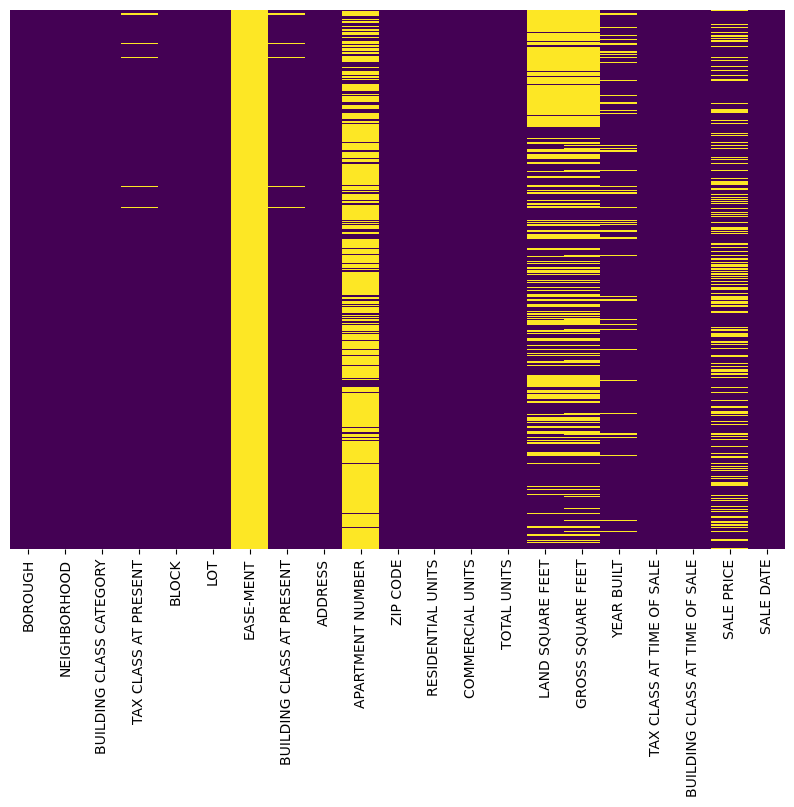

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(nyc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
# drop kolom yang tidak relevan
nyc.drop(['BLOCK','LOT','EASE-MENT','ADDRESS','ZIP CODE','APARTMENT NUMBER'], axis=1, inplace=True)

In [65]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83636 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83636 non-null  category      
 1   NEIGHBORHOOD                    83636 non-null  category      
 2   BUILDING CLASS CATEGORY         83636 non-null  category      
 3   TAX CLASS AT PRESENT            82898 non-null  category      
 4   BUILDING CLASS AT PRESENT       82898 non-null  category      
 5   RESIDENTIAL UNITS               83636 non-null  int64         
 6   COMMERCIAL UNITS                83636 non-null  int64         
 7   TOTAL UNITS                     83636 non-null  int64         
 8   LAND SQUARE FEET                47271 non-null  float64       
 9   GROSS SQUARE FEET               44848 non-null  float64       
 10  YEAR BUILT                      76765 non-null  category      
 11  TA

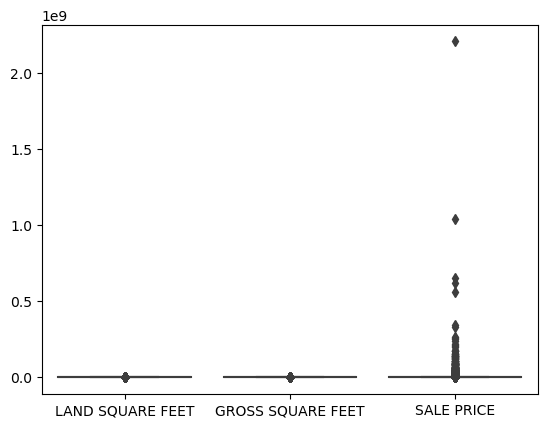

In [66]:
kolom_missing = nyc[['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']]
kolom_missing

sns.boxplot(data=kolom_missing)
plt.show()

karena data memiliki outlier maka, nilai null diganti dengan median

In [67]:
for kolom in kolom_missing:
    median = nyc[kolom].median()
    nyc[kolom].fillna(median, inplace=True)

In [68]:
nyc.dropna(inplace=True)

<Axes: >

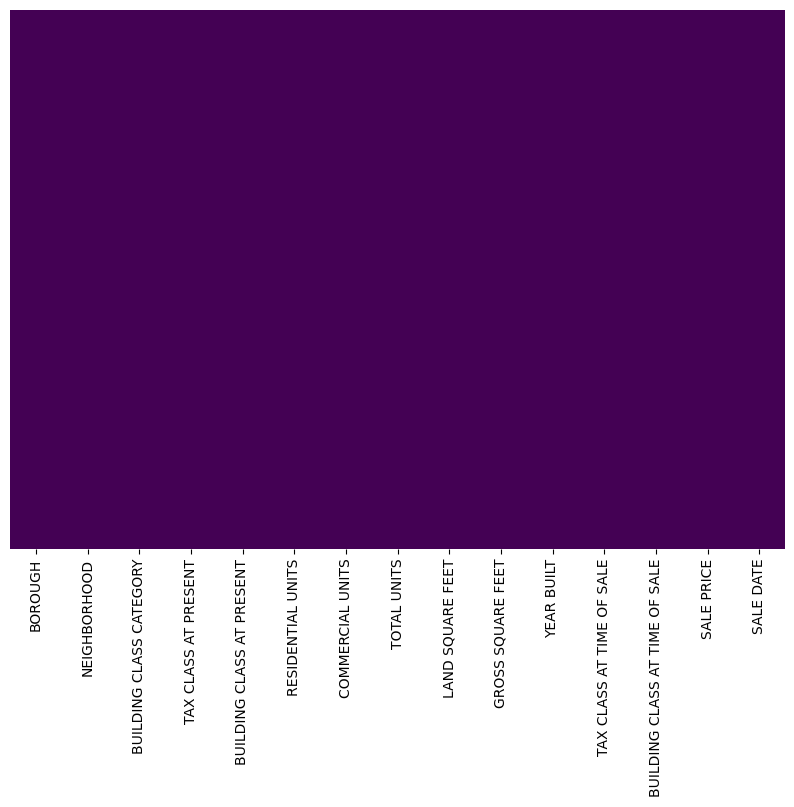

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(nyc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
nyc.describe()
print((nyc == 0).sum())

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                 21195
COMMERCIAL UNITS                  71743
TOTAL UNITS                       16844
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64


diketahui bahwa terdapat 21195 properti tanpa residential units, 71743 properti tanpa commercial unit, dan 16844 tidak memiliki residential dan commercial unit.

# Mean

Rata-rata harga properti di tiap borough ?

In [71]:
# Menghitung median, maksimum, dan minimum LAND SQUARE FEET berdasarkan BOROUGH
borough_stats = nyc.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'mean', 'max']).reset_index()

# Mengganti nama kolom
borough_stats.columns = ['BOROUGH', 'Minimum', 'Mean', 'Maximum']

# Menampilkan DataFrame
print(borough_stats)

         BOROUGH  Minimum          Mean       Maximum
0          Bronx    100.0  8.011086e+05  1.100000e+08
1       Brooklyn    100.0  1.059931e+06  1.542500e+08
2      Manhattan    100.0  2.871452e+06  2.210000e+09
3         Queens    100.0  7.072176e+05  2.575000e+08
4  Staten Island    100.0  5.460001e+05  1.190000e+07


C:\Users\setia\AppData\Local\Temp\ipykernel_13560\3175944450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_borough = nyc.groupby(['BOROUGH']).mean()


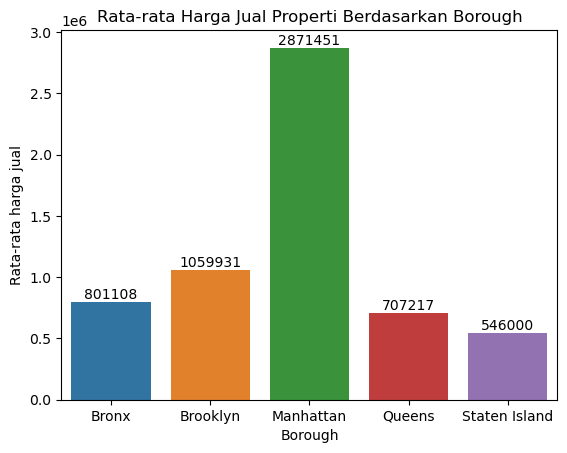

In [72]:
data_borough = nyc.groupby(['BOROUGH']).mean()
data_borough = data_borough['SALE PRICE']

# Menggambarkan bar plot menggunakan Seaborn
ax = sns.barplot(x=data_borough.index, y=data_borough.values)

# Memberikan judul dan label sumbu
plt.title('Rata-rata Harga Jual Properti Berdasarkan Borough')
plt.xlabel('Borough')
plt.ylabel('Rata-rata harga jual')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Menampilkan plot
plt.show()

Gambar di atas menampilkan data rata-rata harga jual properti dari setiap borough. Dari gambar di atas didapatkan kesimpulan bahwa Manhattan menjadi borough dengan rata-rata harga jual properti yang paling tinggi diantara empat borough lainnya.

# Median

Apakah ada perbedaan median ukuran properti antara borough-borough di New York City? jawab pertanyaan ini

In [73]:
# Menghitung median, maksimum, dan minimum LAND SQUARE FEET berdasarkan BOROUGH
borough_stats = nyc.groupby('BOROUGH')['LAND SQUARE FEET'].agg(['min', 'median', 'max']).reset_index()

# Mengganti nama kolom
borough_stats.columns = ['BOROUGH', 'Minimum', 'Median', 'Maximum']

# Menampilkan DataFrame
print(borough_stats)

         BOROUGH  Minimum  Median    Maximum
0          Bronx    297.0  2500.0   679000.0
1       Brooklyn    279.0  2500.0   970000.0
2      Manhattan    384.0  2500.0   364000.0
3         Queens    168.0  2500.0  4228300.0
4  Staten Island    200.0  3100.0  3014056.0


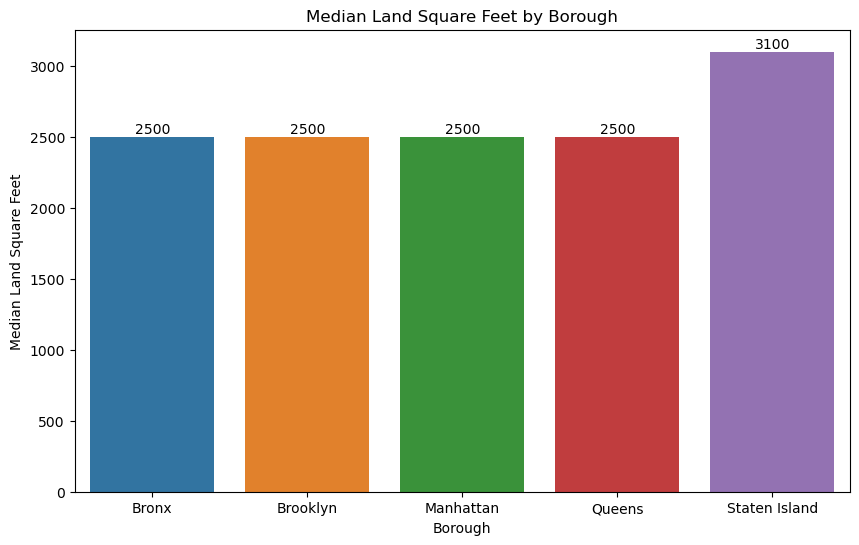

In [74]:
median_nyc = nyc.groupby('BOROUGH')['LAND SQUARE FEET'].median().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=median_nyc, x='BOROUGH', y='LAND SQUARE FEET')
plt.xlabel('Borough')
plt.ylabel('Median Land Square Feet')
plt.title('Median Land Square Feet by Borough')

# Menambahkan nilai median pada bar plot
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

Gambar di atas menunjukkan data median luasan area properti dari masing-masing borough

# Modus

Tipe properti apa yang paling sering muncul dalam data?

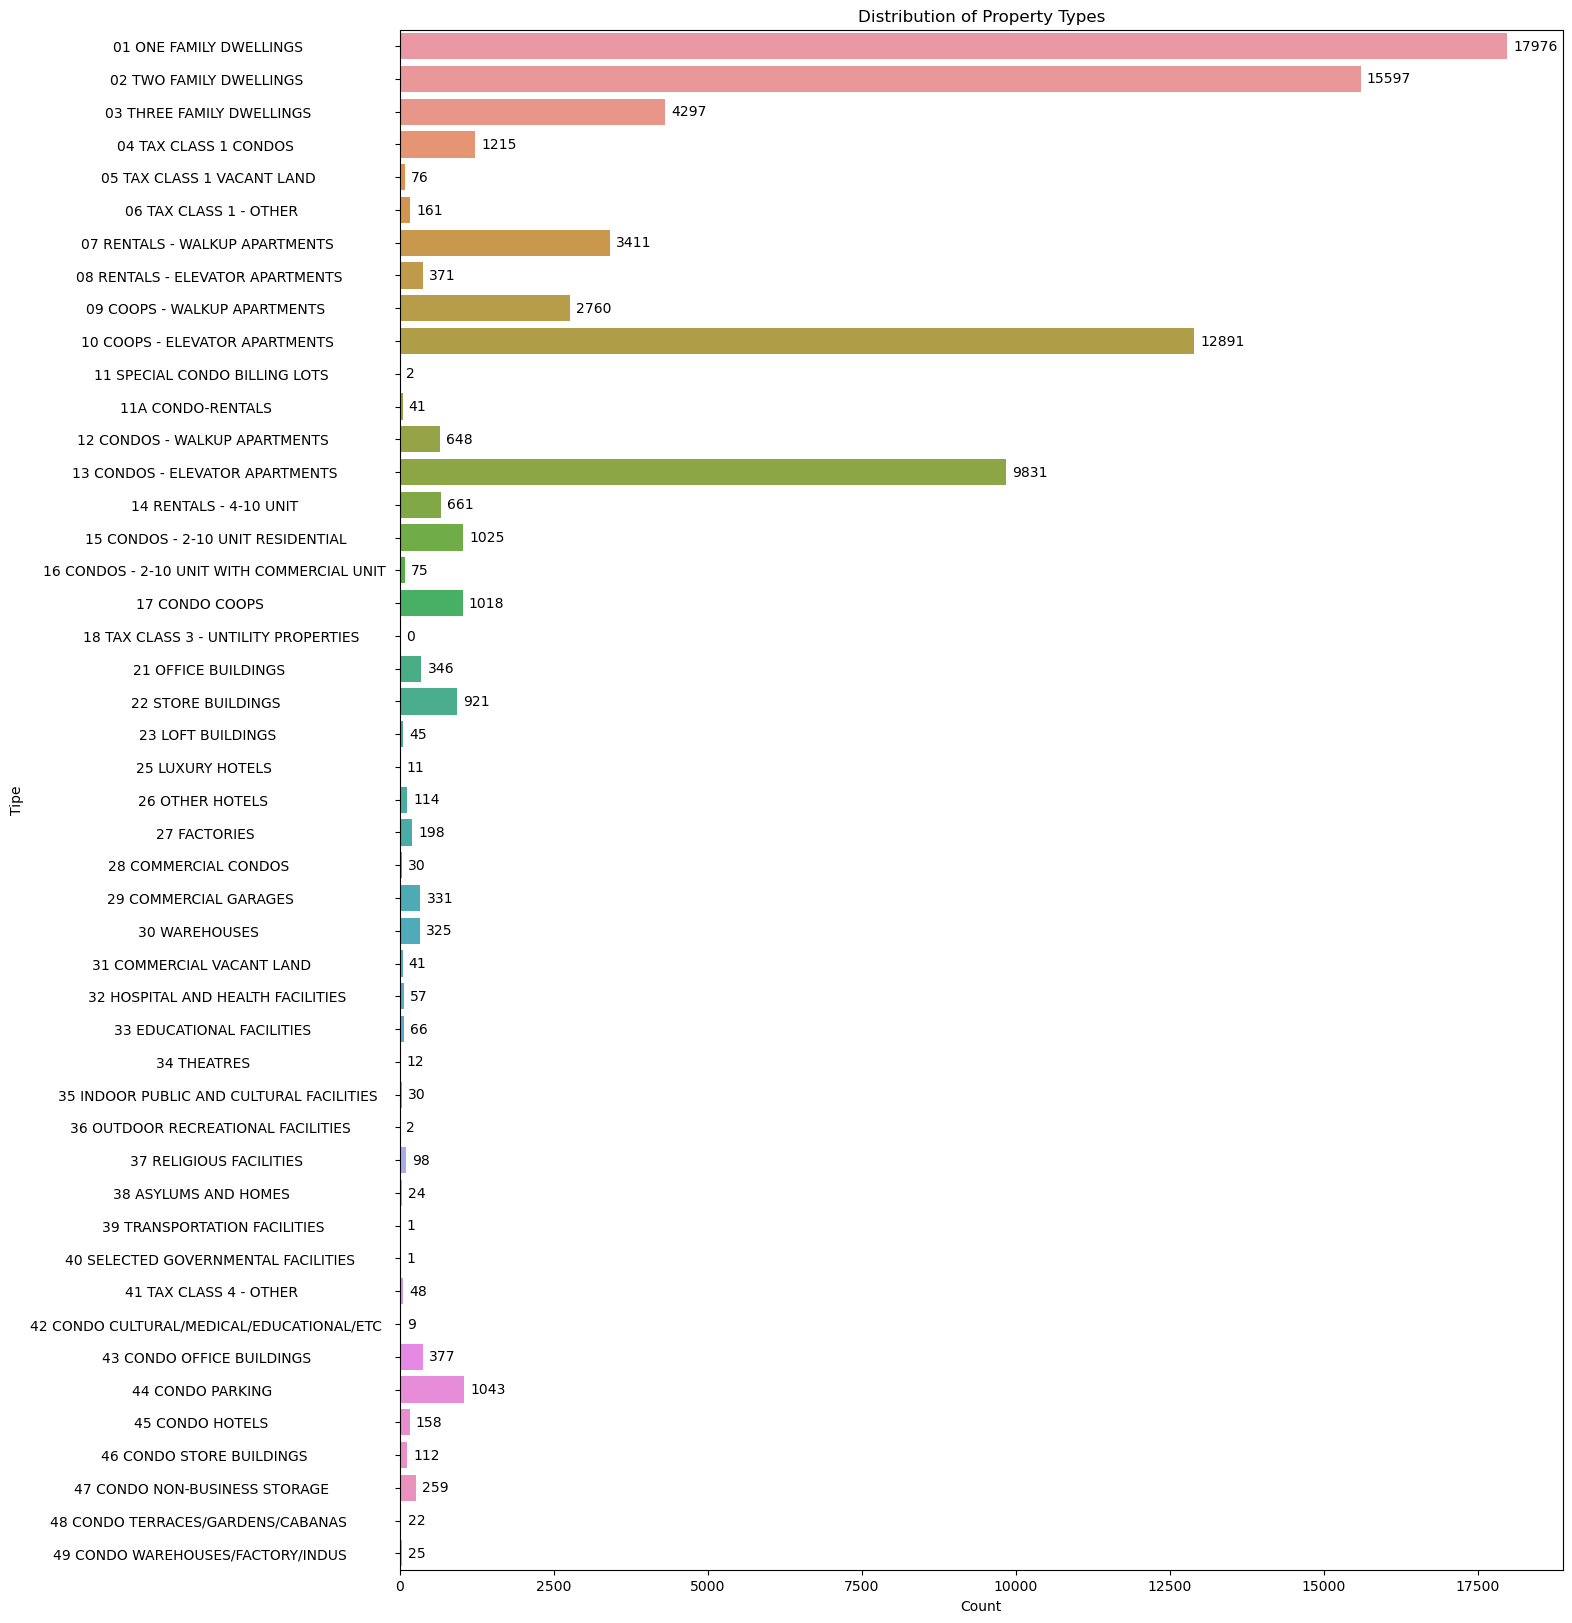

In [75]:
tipe = nyc['BUILDING CLASS CATEGORY'].value_counts().sort_index()


plt.figure(figsize=(15, 20))
sns.barplot(x=tipe.values, y=tipe.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Tipe')
plt.title('Distribution of Property Types')

for i, v in enumerate(tipe.values):
    plt.text(v + 100, i, str(v), va='center', ha='left')

plt.show()

Barplot di atas menampilkan modus data tipe properti. Dari grafik di atas diketahui bahwa tipe properti yang paling banyak di transaksikan adalah tipe "One Family Dwellings" dengan jumlah 17976.

# Range

In [76]:
# Menghitung rentang (range), nilai minimum, dan maksimum SALE PRICE untuk tiap borough
range_sale_price = nyc.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
range_sale_price.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']

# Menampilkan nilai rentang SALE PRICE, nilai minimum, dan maksimum untuk tiap borough
print("Range Data Harga Jual Properti dari Masing-Masing Borough\n")
print(range_sale_price)

Range Data Harga Jual Properti dari Masing-Masing Borough

         BOROUGH  Minimum       Maximum         Range
0          Bronx    100.0  1.100000e+08  1.099999e+08
1       Brooklyn    100.0  1.542500e+08  1.542499e+08
2      Manhattan    100.0  2.210000e+09  2.210000e+09
3         Queens    100.0  2.575000e+08  2.574999e+08
4  Staten Island    100.0  1.190000e+07  1.189990e+07


Data di atas menampilkan data minimum, maximum, dan rentang (range) dari setiap borough. Dari data didapatkan bahwa Manhattan menjadi Borough dengan rentang harga properti yang luas dan bervariasi dengan rentang data 2.210000+e09 dan yang paling kecil adalah Staten Island dengan rentang 1.189990+07.

# Variance

In [77]:
import pandas as pd

# Menghitung varians kolom 'RESIDENTIAL UNITS'
residential_units_variance = nyc['RESIDENTIAL UNITS'].var()

# Menghitung varians kolom 'COMMERCIAL UNITS'
commercial_units_variance = nyc['COMMERCIAL UNITS'].var()

# Menampilkan perbandingan varians
print(f"Varians 'RESIDENTIAL UNITS': {residential_units_variance}")
print(f"Varians 'COMMERCIAL UNITS': {commercial_units_variance}")

# Menghitung perbandingan varians
variance_ratio = residential_units_variance / commercial_units_variance

print(f"Perbandingan Varians: {variance_ratio}")


Varians 'RESIDENTIAL UNITS': 304.95796063996
Varians 'COMMERCIAL UNITS': 83.61154878881534
Perbandingan Varians: 3.6473186426700184


Data di atas menampilkan varians dari unit residensial dan unit komersial. Dari data didapatkan Varians unit residensial memiliki nilai sebesar 304.95796063996, sedangkan varians unit komersial memiliki nilai sebesar 83.61154878881534. Ini menunjukkan bahwa terdapat lebih banyak variasi dalam jumlah unit residensial daripada jumlah unit komersial dalam dataset tersebut. Perbandingan varians antara unit residensial dan unit komersial adalah 3.6473186426700184. Hal ini menunjukkan bahwa variabilitas atau variasi dalam jumlah unit residensial lebih besar sekitar 3.65 kali lipat dibandingkan dengan jumlah unit komersial. Dengan kata lain, variasi dalam jumlah unit residensial cenderung lebih tinggi dibandingkan dengan jumlah unit komersial.

# Standar Deviasi

In [79]:
# Mengubah tipe data kolom 'YEAR BUILT' menjadi numerik
nyc['YEAR BUILT'] = pd.to_numeric(nyc['YEAR BUILT'], errors='coerce')

# Menghitung standar deviasi dari kolom 'YEAR BUILT'
std_year_built = nyc['YEAR BUILT'].std()

# Mencetak nilai standar deviasi dari kolom 'YEAR BUILT'
print("Standar Deviasi YEAR BUILT:", std_year_built)

Standar Deviasi YEAR BUILT: 34.345999558077395


Standar deviasi adalah ukuran yang menggambarkan tingkat dispersi atau variasi data dari nilai rata-rata. Dalam konteks ini, standar deviasi YEAR BUILT menunjukkan seberapa jauh tahun pembangunan properti tersebar dari nilai rata-ratanya. Dengan standar deviasi sebesar 34.345999558077395, dapat dikatakan bahwa tahun pembangunan properti dalam dataset tersebut memiliki variasi atau penyebaran yang relatif kecil di sekitar nilai rata-rata. Hal ini menunjukkan bahwa sebagian besar properti dalam dataset memiliki tahun pembangunan yang relatif dekat dengan nilai rata-rata.

# Probability Distribution

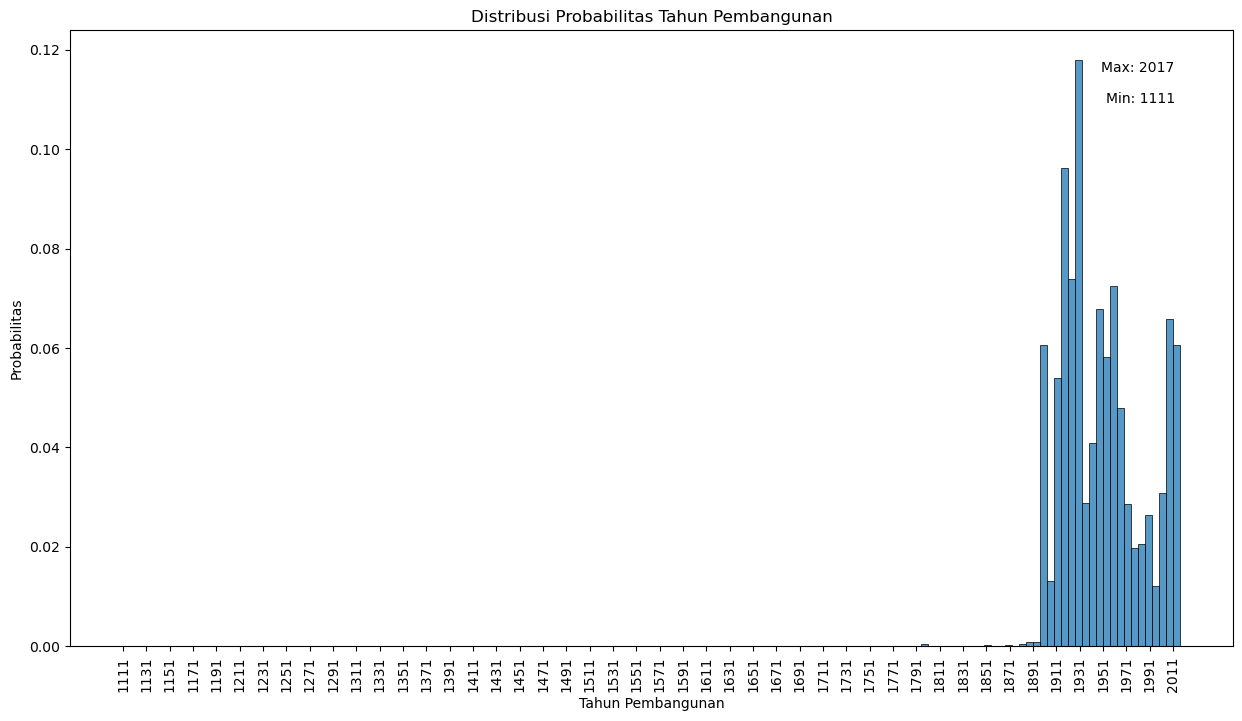

In [155]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 8))

# Membuat histogram distribusi probabilitas Tahun Pembangunan
sns.histplot(data=nyc, x='YEAR BUILT', bins=151, kde=False, stat='probability')
plt.xlabel('Tahun Pembangunan')
plt.ylabel('Probabilitas')
plt.title('Distribusi Probabilitas Tahun Pembangunan')

# Menampilkan tahun maksimum dan minimum
plt.text(0.95, 0.95, f"Max: {max(nyc['YEAR BUILT'])}", ha='right', va='top', transform=plt.gca().transAxes)
plt.text(0.95, 0.9, f"Min: {min(nyc['YEAR BUILT'])}", ha='right', va='top', transform=plt.gca().transAxes)

# Menambah jumlah tick pada sumbu x
plt.xticks(ticks=range(min(nyc['YEAR BUILT']), max(nyc['YEAR BUILT']) + 1, 20), rotation=90)

# Menampilkan plot
plt.show()


Gambar di atas menampilkan distribusi data tahun pembangunan properti di New York. Didapatkan kesimpulan bahwa bangunan properti di New York banyak di bangun pada rentang tahun 1911 sampai dengan 1931.

# Confidence Interval

In [156]:
import numpy as np
from scipy import stats

# Mengambil variabel SALE PRICE dari dataset
sale_price = nyc['SALE PRICE']

# Menghitung mean dan standard deviation
mean = np.mean(sale_price)
std_dev = np.std(sale_price)

# Mengatur level kepercayaan (misalnya, 95%)
confidence_level = 0.95

# Menghitung ukuran sampel
sample_size = len(sale_price)

# Menghitung z-score berdasarkan level kepercayaan
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Menghitung confidence interval
margin_of_error = z_score * (std_dev / np.sqrt(sample_size))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Menampilkan hasil confidence interval
print("Confidence Interval ({}%):".format(confidence_level * 100))
print(confidence_interval)


Confidence Interval (95.0%):
(1170390.4298830586, 1321664.7364231865)


Data di atas menampilkan hasil perhitungan confidence interval dengan tingkat kepercayaan 95%. Ini berarti dengan tingkat kepercayaan 95%, kita dapat mengatakan bahwa mean (rata-rata) harga penjualan properti di dataset ini jatuh dalam rentang antara $1,170,390.43 hingga $1,321,664.74. Rentang confidence interval yang diperoleh adalah $1,170,390.43 hingga $1,321,664.74. Artinya, kita dapat mengatakan dengan 95% kepercayaan bahwa rata-rata harga penjualan properti di dataset ini berada dalam rentang tersebut. Confidence interval ini memberikan informasi penting tentang ketidakpastian estimasi rata-rata harga penjualan properti. Semakin sempit intervalnya, semakin akurat estimasi rata-rata tersebut.